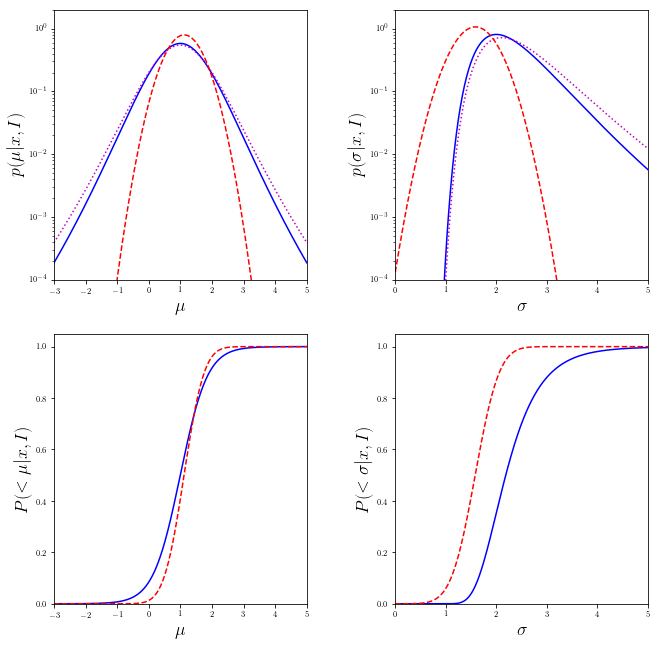

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats import mean_sigma
from astroML.resample import bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


#------------------------------------------------------------
# Define functions for computations below
#  These are expected analytic fits to the posterior distributions
def compute_pmu(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * n)


def compute_pmu_alt(mu, xbar, V, n):
    return (1 + (xbar - mu) ** 2 / V) ** (-0.5 * (n - 1))


def compute_psig(sig, V, n):
    return (sig ** -n) * np.exp(-0.5 * n * V / sig ** 2)


def compute_psig_alt(sig, V, n):
    return (sig ** -(n - 1)) * np.exp(-0.5 * n * V / sig ** 2)


def gaussian(x, mu, sigma):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)


#------------------------------------------------------------
# Draw a random sample from the distribution, and compute
# some quantities
n    = 10
xbar = 1
V    = 4
sigma_x = np.sqrt(V)

np.random.seed(10)
xi = np.random.normal(xbar, sigma_x, size=n)

mu_mean, sig_mean = mean_sigma(xi, ddof=1)

# compute the analytically expected spread in measurements
mu_std = sig_mean / np.sqrt(n)
sig_std = sig_mean / np.sqrt(2 * (n - 1))

#------------------------------------------------------------
# bootstrap estimates
#mu_bootstrap, sig_bootstrap = bootstrap(xi, 1E6, mean_sigma, kwargs=dict(ddof=1, axis=1))

#------------------------------------------------------------
# Compute analytic posteriors

# distributions for the mean
mu = np.linspace(-3, 5, 1000)
dmu = mu[1] - mu[0]

pmu = compute_pmu(mu, 1, 4, 10)
pmu /= (dmu * pmu.sum())

pmu2 = compute_pmu_alt(mu, 1, 4, 10)
pmu2 /= (dmu * pmu2.sum())

pmu_norm = gaussian(mu, mu_mean, mu_std)
pmu_norm /= (dmu * pmu_norm.sum())

#mu_hist, mu_bins = np.histogram(mu_bootstrap, 20)
#mu_dbin = np.diff(mu_bins).astype(float)
#mu_hist = mu_hist / mu_dbin / mu_hist.sum()

# distributions for the standard deviation
sig = np.linspace(1E-4, 8, 1000)
dsig = sig[1] - sig[0]
psig = compute_psig(sig, 4, 10)
psig /= (dsig * psig.sum())

psig2 = compute_psig_alt(sig, 4, 10)
psig2 /= (dsig * psig2.sum())

psig_norm = gaussian(sig, sig_mean, sig_std)
psig_norm /= (dsig * psig_norm.sum())

#sig_hist, sig_bins = np.histogram(sig_bootstrap, 20)
#sig_dbin = np.diff(sig_bins).astype(float)
#sig_hist = sig_hist / sig_dbin / sig_hist.sum()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(wspace=0.35, right=0.95,
                    hspace=0.2, top=0.95)

# plot posteriors for mu
ax1 = plt.subplot(221, yscale='log')
ax1.plot(mu, pmu, '-b')
ax1.plot(mu, pmu2, ':m')
ax1.plot(mu, pmu_norm, '--r')
#ax1.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist,
#            color='k', facecolor='none')

ax1.set_xlabel(r'$\mu$', fontsize=18)
ax1.set_ylabel(r'$p(\mu|x,I)$', fontsize=18)

ax2 = plt.subplot(223, sharex=ax1)
ax2.plot(mu, pmu.cumsum() * dmu, '-b')
ax2.plot(mu, pmu_norm.cumsum() * dmu, '--r')
#ax2.scatter(mu_bins[1:] - 0.5 * mu_dbin, mu_hist.cumsum() * mu_dbin,
#            color='k', facecolor='none')
ax2.set_xlim(-3, 5)



ax2.set_xlabel(r'$\mu$', fontsize=18)
ax2.set_ylabel(r'$P(<\mu|x,I)$', fontsize=18)

# plot posteriors for sigma
ax3 = plt.subplot(222, sharey=ax1)
ax3.plot(sig, psig, '-b')
ax3.plot(sig, psig2, ':m')
ax3.plot(sig, psig_norm, '--r')
#ax3.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist,
#            color='k', facecolor='none')
ax3.set_ylim(1E-4, 2)

ax3.set_xlabel(r'$\sigma$', fontsize=18)
ax3.set_ylabel(r'$p(\sigma|x,I)$', fontsize=18)

ax4 = plt.subplot(224, sharex=ax3, sharey=ax2)
ax4.plot(sig, psig.cumsum() * dsig, '-b')
ax4.plot(sig, psig_norm.cumsum() * dsig, '--r')
#ax4.scatter(sig_bins[1:] - 0.5 * sig_dbin, sig_hist.cumsum() * sig_dbin,
#            color='k', facecolor='none')
ax4.set_ylim(0, 1.05)
ax4.set_xlim(0, 5)

ax4.set_xlabel(r'$\sigma$', fontsize=18)
ax4.set_ylabel(r'$P(<\sigma|x,I)$', fontsize=18)

plt.show()
